In [7]:
import random, math, pylab, numpy as np

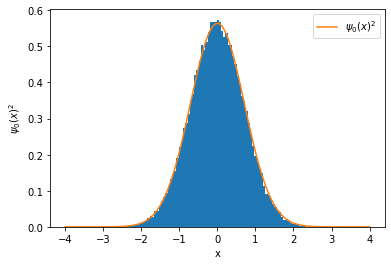

In [28]:
def psi0_sq(x):
    return math.exp(-x**2)/(math.pi)**0.5

x = 0.0
delta = 0.5
pos=[]
for k in range(100000):
    x_new = x + random.uniform(-delta, delta)
    if random.uniform(0.0, 1.0) < psi0_sq(x_new) / psi0_sq(x): 
        x = x_new 
    pos.append(x)

pylab.hist(pos,bins=100,density=True)
dataset_x = np.linspace(-4,4,100)
dataset_psi= [psi0_sq(i) for i in dataset_x]
pylab.plot(dataset_x, dataset_psi, label='$\psi_0(x)^2$')
pylab.xlabel('x')
pylab.ylabel('$\psi_0(x)^2$')
pylab.legend()
pylab.savefig('Psi square versus position.png')
pylab.show()

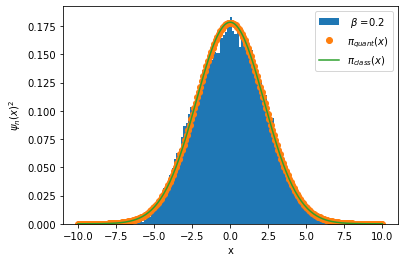

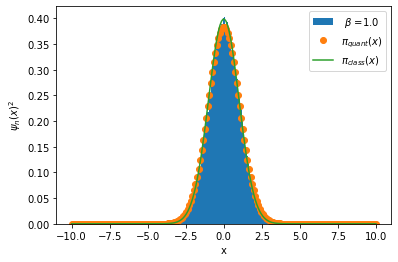

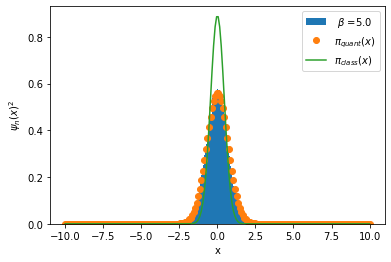

In [67]:
def psi_n_sq(x, n):
    if n == -1:
        return 0.0
    else:
        psi = [math.exp(-x ** 2 / 2.0) / math.pi ** 0.25]
        psi.append(math.sqrt(2.0) * x * psi[0])
        for k in range(2, n + 1):
            psi.append(math.sqrt(2.0 / k) * x * psi[k - 1] -
                       math.sqrt((k - 1.0) / k) * psi[k - 2])
        return psi[n] ** 2

def pi_quant(x,beta):
    return math.sqrt(math.tanh(beta/2) / math.pi)*math.exp(- (x**2) * math.tanh(beta/2))

def pi_class(x,beta):
    return math.sqrt(beta/ (2*math.pi))*math.exp(- beta*(x**2)/ 2)

def posh(x,n,beta):
    pos=[]
    delta = 0.5
    for k in range(100000):
        x_new = x + random.uniform(-delta, delta)
        if psi_n_sq(x,n)==0:
            x=x_new
        elif random.uniform(0.0, 1.0) < psi_n_sq(x_new, n) / psi_n_sq(x, n): 
            x = x_new
    
        m = n + random.choice([-1,1])
        if m >= 0:
            r=random.uniform(0.0,1.0)
            exp=math.exp(-beta*(m-n))
            if psi_n_sq(x,n)==0:
                if r < exp:
                    n = m
            elif  r < (psi_n_sq(x, m) / psi_n_sq(x, n))*exp:
                n = m
        pos.append(x)
    return pos

x = 0.0
n = 0
beta = [0.2,1.0,5.0]

for i in range(len(beta)):
    pos=posh(x,n,beta[i])
    pylab.hist(pos,bins=100,label=' $\\beta$ ='+str(beta[i]),density=True)
    pylab.xlabel('x')
    pylab.ylabel('$\psi_n(x)^2$')
    dataset=np.linspace(-10,10,200)
    quant=[pi_quant(a,beta[i]) for a in dataset]
    clas=[pi_class(a,beta[i]) for a in dataset]
    pylab.plot(dataset,quant, 'o',label='$\pi_{quant}(x)$')
    pylab.plot(dataset,clas, label='$\pi_{class}(x)$')
    pylab.legend()
    pylab.savefig('Psi n square versus position in beta ='+str(float(beta[i]))+'.png')
    pylab.show()
    

beta: 0.015625 -> 0.03125
beta: 0.03125 -> 0.0625
beta: 0.0625 -> 0.125
beta: 0.125 -> 0.25
beta: 0.25 -> 0.5
beta: 0.5 -> 1.0
beta: 1.0 -> 2.0
beta: 2.0 -> 4.0


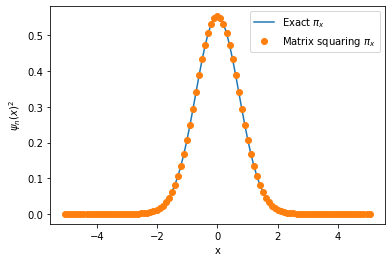

In [89]:
# Free off-diagonal density matrix
def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

# Harmonic density matrix in the Trotter approximation (returns the full matrix)
def rho_harmonic_trotter(grid, beta):
    return np.array([[rho_free(x, xp, beta) * \
                         np.exp(-0.5 * beta * 0.5 * (x ** 2 + xp ** 2)) \
                         for x in grid] for xp in grid])


x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)]
beta_tmp = 2.0 ** (-6)                   # initial value of beta (power of 2)
beta     = 2.0 ** 2                      # actual value of beta (power of 2)
rho = rho_harmonic_trotter(x, beta_tmp)  # density matrix at initial beta
while beta_tmp < beta:
    rho = np.dot(rho, rho)
    rho *= dx
    beta_tmp *= 2.0
    print ('beta: %s -> %s' % (beta_tmp / 2.0, beta_tmp))
    
Z = sum(rho[j, j] for j in range(nx + 1)) * dx
pi_of_x = [rho[j, j] / Z for j in range(nx + 1)]
pylab.plot(x,[pi_quant(a,beta) for a in x],label='Exact $\pi_x$')
pylab.plot(x,pi_of_x,'o',label='Matrix squaring $\pi_x$')
pylab.xlabel('x')
pylab.ylabel('$\psi_n(x)^2$')
pylab.legend()
pylab.savefig('Matrixsq Harmonic beta = '+str(beta)+'.png')
pylab.show()

f = open('data_harm_matrixsquaring_beta' + str(beta) + '.dat', 'w')
for j in range(nx + 1):
    f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
f.close()

In [ ]:
#If beta_tmp not small enough, at least 0.5 compare to beta, the trotter approximation is broken, and the analytic function give the different result with the histogram
#If discretization relate to value of beta and iteration of nx to x_max not enough large, the same falsity will also happen 
#There is no significant difference between histogram x[0] and x[1]. It is correct for entire path.

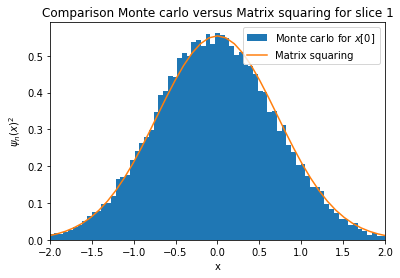

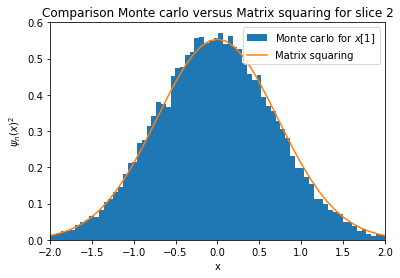

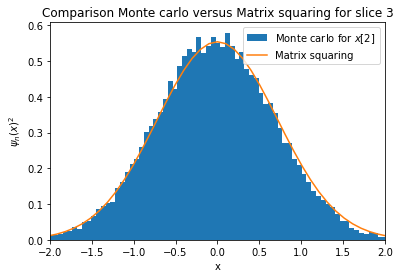

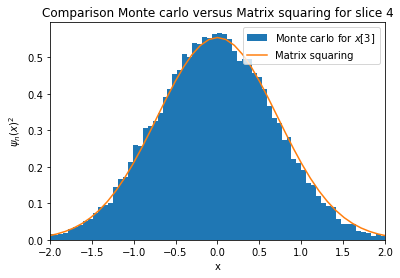

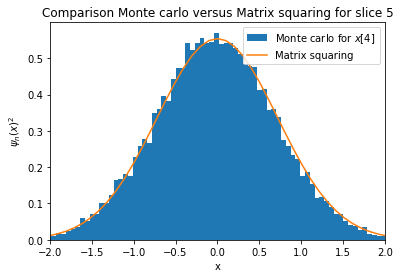

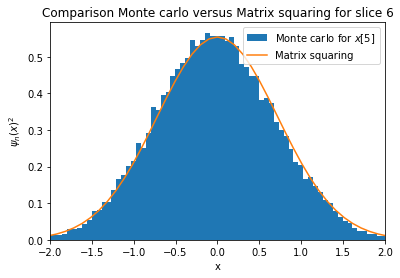

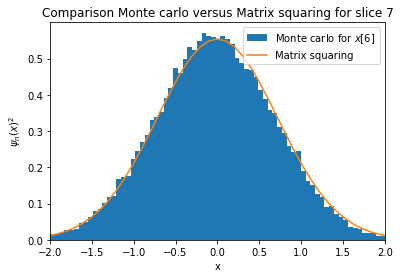

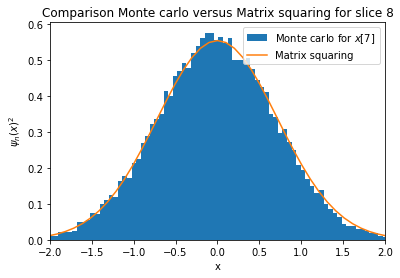

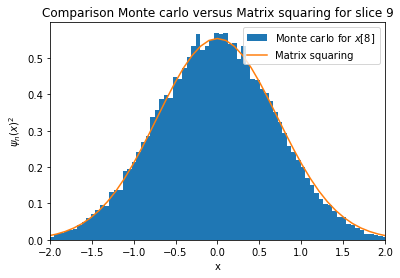

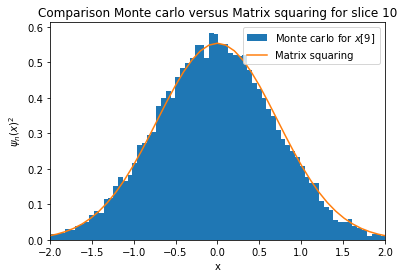

In [98]:
def rho_free(x, y, beta):    # free off-diagonal density matrix
    return math.exp(-(x - y) ** 2 / (2.0 * beta)) 

def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
        for line in f:
            x, y = line.split()
            list_x.append(float(x))
            list_y.append(float(y))
    f.close()
    return list_x, list_y

beta = 4.0
N = 10                                            # number of slices
dtau = beta / N
delta = 1.0                                       # maximum displacement on one slice
n_steps = 1000000                                 # number of Monte Carlo steps
x = [0.0] * N
data = []
x1=read_file('data_harm_matrixsquaring_beta4.0.dat')
for i in range(N):
    data.append([i+10])
for step in range(n_steps):
    k = random.randint(0, N - 1)                  # random slice
    knext, kprev = (k + 1) % N, (k - 1) % N       # next/previous slices
    x_new = x[k] + random.uniform(-delta, delta)  # new position at slice k
    old_weight  = (rho_free(x[knext], x[k], dtau) *
                   rho_free(x[k], x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x[k] ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_new ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
    if step%N==0:
        for i in range(N):
            data[i].append(x[i])

for i in range(N):
    pylab.figure(i+1)
    pylab.hist(data[i][1:], density=True,bins=100, label='Monte carlo for $x[$'+str(i)+']')
    pylab.plot(x1[0],x1[1], label='Matrix squaring')
    pylab.xlim(-2.0, 2.0)
    pylab.legend()
    pylab.xlabel('x')
    pylab.ylabel('$\psi_n(x)^2$')
    pylab.title('Comparison Monte carlo versus Matrix squaring for slice '+str(i+1))
    pylab.savefig('Monte carlo comparison for slice x'+str(i)+'.png')
    pylab.show



beta: 0.015625 -> 0.03125
beta: 0.03125 -> 0.0625
beta: 0.0625 -> 0.125
beta: 0.125 -> 0.25
beta: 0.25 -> 0.5
beta: 0.5 -> 1.0
beta: 1.0 -> 2.0
beta: 2.0 -> 4.0


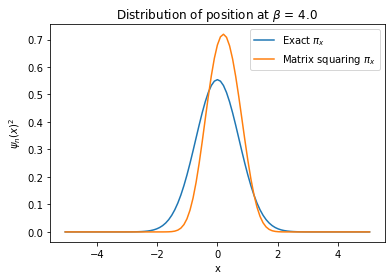

In [107]:
def V(x,cubic,quartic):
    return x ** 2 / 2.0 + cubic * x ** 3 + quartic * x ** 4

# Free off-diagonal density matrix
def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

def rho_anharmonic_trotter(grid,beta,cubic,quartic):
    return np.array([[rho_free(x, xp, beta) * \
                      np.exp(-0.5 * beta * (V(x, cubic, quartic) + V(xp, cubic, quartic))) \
                             for x in grid] for xp in grid])


qua=1.0
cub=-qua
x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)]
beta_tmp = 2.0 ** (-6)                   # initial value of beta (power of 2)
beta     = 2.0 ** 2                      # actual value of beta (power of 2)
rho = rho_anharmonic_trotter(x, beta_tmp,cub,qua)  # density matrix at initial beta
while beta_tmp < beta:
    rho = np.dot(rho, rho)
    rho *= dx
    beta_tmp *= 2.0
    print ('beta: %s -> %s' % (beta_tmp / 2.0, beta_tmp))
    
Z = sum(rho[j, j] for j in range(nx + 1)) * dx
pi_of_x = [rho[j, j] / Z for j in range(nx + 1)]
pylab.plot(x,[pi_quant(a,beta) for a in x],label='Exact $\pi_x$')
pylab.plot(x,pi_of_x,'-',label='Matrix squaring $\pi_x$')
pylab.xlabel('x')
pylab.ylabel('$\psi_n(x)^2$')
pylab.title('Distribution of position at $\\beta$ = ' +str(beta))
pylab.legend()
pylab.savefig('Matrixsq Anharmonic beta = '+str(beta)+'.png')
pylab.show()

f = open('data_anharm_matrixsquaring_beta' + str(beta) + '.dat', 'w')
for j in range(nx + 1):
    f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
f.close()

In [ ]:
#The peak of the graph had a slight shift out of origin 0

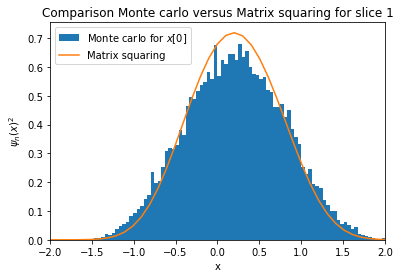

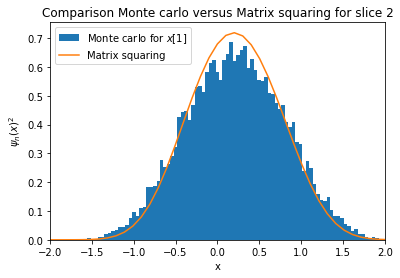

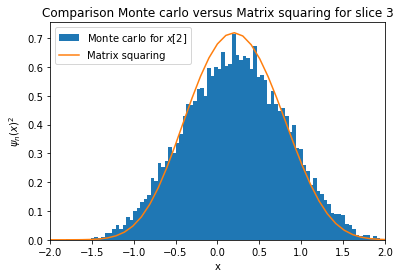

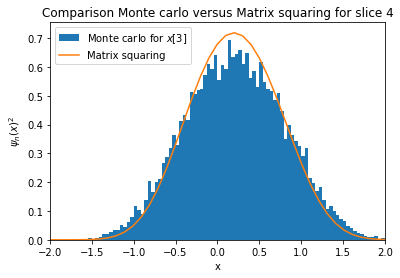

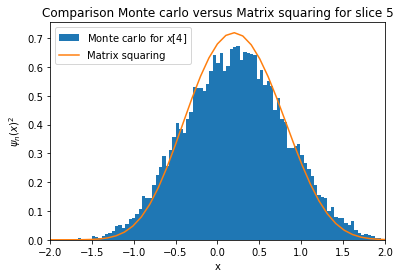

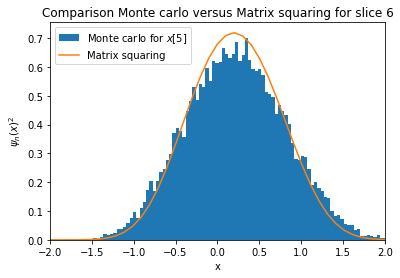

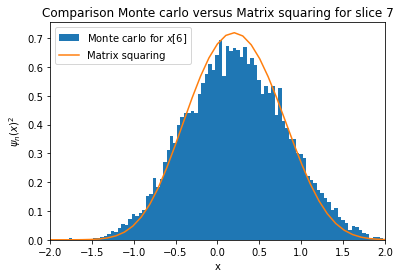

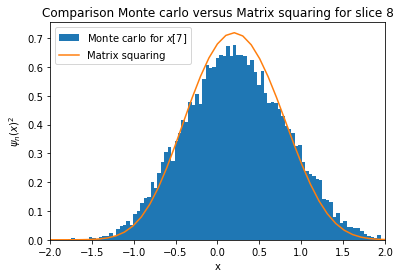

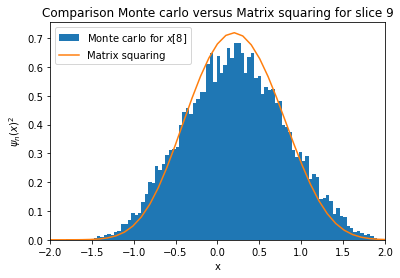

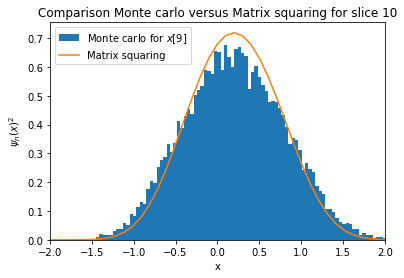

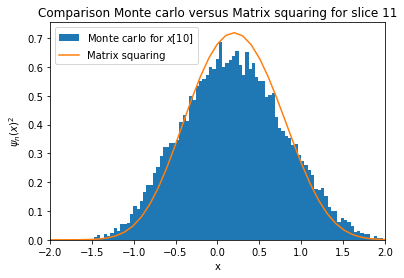

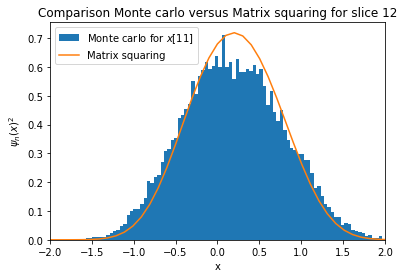

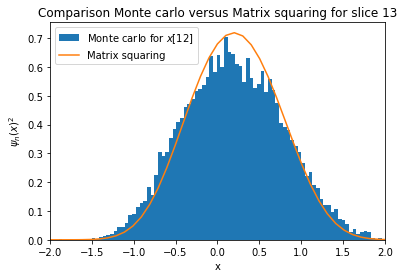

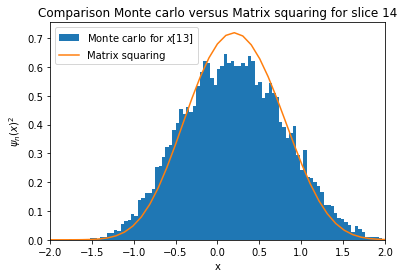

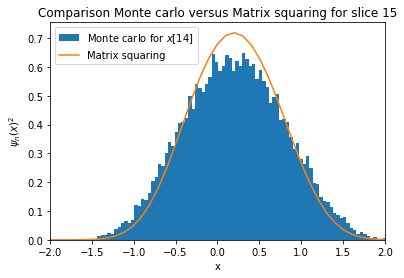

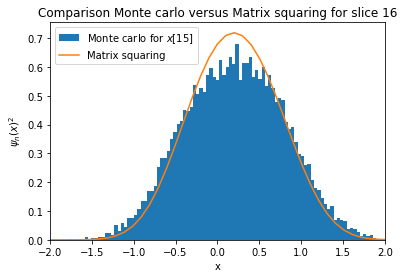

In [110]:
def V(x,cubic,quartic):
    return x**2 / 2.0 + cubic * x ** 3 + quartic * x ** 4

def rho_free(x, y, beta):    # free off-diagonal density matrix
    return math.exp(-(x - y) ** 2 / (2.0 * beta)) 

def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
        for line in f:
            x, y = line.split()
            list_x.append(float(x))
            list_y.append(float(y))
    f.close()
    return list_x, list_y

qua=1.0
cub=-qua
beta = 4.0
N = 16                                            # number of slices
dtau = beta / N
delta = 1.0                                       # maximum displacement on one slice
n_steps = 1000000                                 # number of Monte Carlo steps
x = [0.0] * N
data = []
x1=read_file('data_anharm_matrixsquaring_beta4.0.dat')
for i in range(N):
    data.append([i+10])
for step in range(n_steps):
    k = random.randint(0, N - 1)                  # random slice
    knext, kprev = (k + 1) % N, (k - 1) % N       # next/previous slices
    x_new = x[k] + random.uniform(-delta, delta)  # new position at slice k
    old_weight  = (rho_free(x[knext], x[k], dtau) *
                   rho_free(x[k], x[kprev], dtau) *
                   math.exp(-0.5 * dtau * V(x[k],cub,qua)))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * V(x_new,cub,qua)))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
    if step%N==0:
        for i in range(N):
            data[i].append(x[i])

for i in range(N):
    pylab.figure(i+1)
    pylab.hist(data[i][1:], density=True,bins=100, label='Monte carlo for $x[$'+str(i)+']')
    pylab.plot(x1[0],x1[1], label='Matrix squaring')
    pylab.xlim(-2.0, 2.0)
    pylab.legend()
    pylab.xlabel('x')
    pylab.ylabel('$\psi_n(x)^2$')
    pylab.title('Comparison Monte carlo versus Matrix squaring for slice '+str(i+1))
    pylab.savefig('anha-Monte carlo comparison for slice x'+str(i)+'.png')
    pylab.show

In [139]:
def V(x,cubic,quartic):
    return x ** 2 / 2.0 + cubic * x ** 3 + quartic * x ** 4

# Free off-diagonal density matrix
def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

def rho_anharmonic_trotter(grid,beta,cubic,quartic):
    return np.array([[rho_free(x, xp, beta) * \
                      np.exp(-0.5 * beta * (V(x, cubic, quartic) + V(xp, cubic, quartic))) \
                             for x in grid] for xp in grid])

def Energy_pert(n, cubic, quartic):
    return n + 0.5 - 15.0 / 4.0 * cubic **2 * (n ** 2 + n + 11.0 / 30.0) \
         + 3.0 / 2.0 * quartic * (n ** 2 + n + 1.0 / 2.0)

def Z_pert(cubic, quartic, beta, n_max):
    Z = sum(math.exp(-beta * Energy_pert(n, cubic, quartic)) for n in range(n_max + 1))
    return Z

qua= [0.001,0.01,0.1,0.2,0.3,0.4,0.5]
x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)]
beta_tmp = 2.0 ** (-6)                   # initial value of beta (power of 2)
beta     = 2.0 ** 1                      # actual value of beta (power of 2)
print('quartic | Z | Z pertubation | Similarity')
for i in range(len(qua)):
    rho = rho_anharmonic_trotter(x, beta_tmp,-qua[i],qua[i])  # density matrix at initial beta
    while beta_tmp < beta:
        rho = np.dot(rho, rho)
        rho *= dx
        beta_tmp *= 2.0

    Z = sum(rho[j, j] for j in range(nx + 1)) * dx
    pi_of_x = [rho[j, j] / Z for j in range(nx + 1)]
    try:
        Z2 = Z_pert(-qua[i],qua[i],beta, nx)
    except OverflowError:
        Z2 = 'Math overflow'
    
    if Z2 != 'Math overflow':
        print(qua[i],'|', Z,'|', Z2,'|', Z2/Z) 
    else: print(qua[i],'|', Z,'|', Z2)
    

quartic | Z | Z pertubation | Similarity
0.001 | 0.4243761801589153 | 0.424365129707959 | 0.9999739607181718
0.01 | 0.4932119117202093 | 0.4150524186187612 | 0.8415295915525522
0.1 | 0.4586545206649605 | 0.3551514716022911 | 0.7743333066626925
0.2 | 0.4389872122616267 | 0.32775877165084777 | 0.7466248731079456
0.3 | 0.4263343738551318 | 0.327846128879344 | 0.7689882612907631
0.4 | 0.4173115899353957 | 0.362552298948946 | 0.8687808047820406
0.5 | 0.41052841619431585 | Math overflow


In [125]:
def V(x,cubic, quartic):
    return x*x* (0.5 + x*(cubic+x*quartic))

# Free off-diagonal density matrix
def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

# Harmonic density matrix in the Trotter approximation (returns the full matrix)
def rho_harmonic_trotter(grid, beta):
    return np.array([[rho_free(x, xp, beta) * \
                         np.exp(-0.5 * beta * 0.5 * (x ** 2 + xp ** 2)) \
                         for x in grid] for xp in grid])

def rho_anharmonic_trotter(grid, beta):
    return np.array([[rho_free(x, xp, beta) * \
                         np.exp(-0.5 * beta * ( V(x,cubic, quartic) +  V(xp,cubic, quartic))) \
                         for x in grid] for xp in grid])

# Theoretical probability density for Harmonc
# I've kept this, as it shows the diffeence between harmon and anharmonic
def pi_quant(x):
    return math.sqrt( math.tanh(beta/2) / math.pi)* math.exp( - x*x * math.tanh(beta/2) )

def Energy_pert(n, cubic, quartic):
    return n + 0.5 - 15.0 / 4.0 * cubic **2 * (n ** 2 + n + 11.0 / 30.0) \
         + 3.0 / 2.0 * quartic * (n ** 2 + n + 1.0 / 2.0)

def Z_pert(cubic, quartic, beta, n_max):
    return sum(math.exp(-beta * Energy_pert(n, cubic, quartic)) for n in range(n_max + 1))
    

if __name__=='__main__':
    for quartic in [0.001,0.01,0.1,0.2,0.3,0.4,0.5]:
        cubic= - quartic
        x_max = 5.0
        nx = 100
        dx = 2.0 * x_max / (nx - 1)
        x = [i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)]
        beta_tmp = 2.0 ** (-5)                   # initial value of beta (power of 2)
        beta     = 2.0 ** 1                      # actual value of beta (power of 2)
        rho = rho_anharmonic_trotter(x, beta_tmp)  # density matrix at initial beta
        while beta_tmp < beta:
            rho = np.dot(rho, rho)
            rho *= dx
            beta_tmp *= 2.0
            #print ('beta: %s -> %s' % (beta_tmp / 2.0, beta_tmp))
        
        Z = sum(rho[j, j] for j in range(nx + 1)) * dx
        try:
            Zp=Z_pert(cubic, quartic, beta, nx)
            print ('{0}\t{1}\t{2}\t{3:.1f}%'.format(quartic,Z,Zp,100*abs(Z-Zp)/Z))
        except OverflowError:
            print('{0} ***'.format(quartic))


0.001	0.4243933472931773	0.424365129707959	0.0%
0.01	0.4154857596638167	0.4150524186187612	0.1%
0.1	0.3632041700981503	0.3551514716022911	2.2%
0.2	0.33195637341124634	0.32775877165084777	1.3%
0.3	0.31086144336157245	0.327846128879344	5.5%
0.4	0.29504539702350097	0.362552298948946	22.9%
0.5 ***


In [ ]:
#The value is almost similar but they get higher difference at larger quartic=-cubic